#📌 Extracão

In [5]:
import pandas as pd
import json

# Carregar o arquivo JSON. Certifique-se de que o arquivo "TelecomX_Data.json"
# foi carregado para o ambiente do Google Colab.
with open('TelecomX_Data.json', 'r') as f:
    data = json.load(f)

# Criar um DataFrame a partir dos dados do JSON.
df_telecom = pd.DataFrame(data)

# Visualizar as primeiras linhas do DataFrame
print("Primeiras linhas do DataFrame após a extração:")
print(df_telecom.head())

Primeiras linhas do DataFrame após a extração:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetSe

#🔧 Transformação

/tmp/ipython-input-1085429373.py:62: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['TotalCharges'].fillna(0, inplace=True)
/tmp/ipython-input-1085429373.py:63: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

DataFrame após a limpeza e transformação:
   CustomerID Churn  Gender  SeniorCitizen Partner Dependents  Tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes  

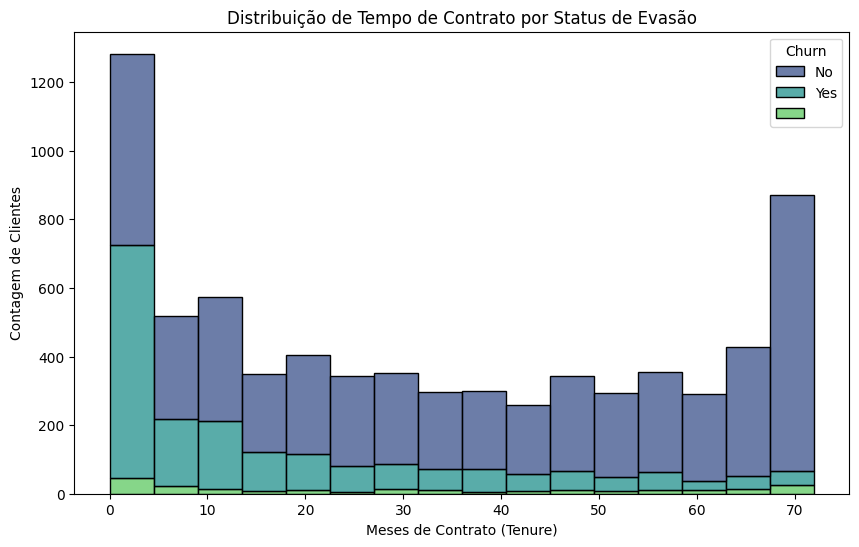

In [7]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preparação e Extração dos Dados
try:
    with open('TelecomX_Data.json', 'r') as f:
        data = json.load(f)
except FileNotFoundError:
    print("Erro: O arquivo 'TelecomX_Data.json' não foi encontrado. Por favor, certifique-se de que ele foi carregado para o ambiente do Colab.")
    exit()

# Desaninhamento das colunas
data_list = []
for record in data:
    record_copy = record.copy()

    # Desaninhando 'customer', 'phone', 'internet', 'account' e 'Charges'
    record_copy.update(record_copy.pop('customer'))
    record_copy.update(record_copy.pop('phone'))
    record_copy.update(record_copy.pop('internet'))

    account_data = record_copy.pop('account')
    charges_data = account_data.pop('Charges')
    record_copy.update(account_data)
    record_copy.update(charges_data)

    data_list.append(record_copy)

# Criar o DataFrame final
df_final = pd.DataFrame(data_list)

# 2. Transformação e Limpeza dos Dados
# 2.1 Renomear colunas para maior clareza ANTES de qualquer operação
df_final.rename(columns={
    'customerID': 'CustomerID',
    'gender': 'Gender',
    'SeniorCitizen': 'SeniorCitizen',
    'Partner': 'Partner',
    'Dependents': 'Dependents',
    'tenure': 'Tenure',
    'PhoneService': 'PhoneService',
    'MultipleLines': 'MultipleLines',
    'InternetService': 'InternetService',
    'OnlineSecurity': 'OnlineSecurity',
    'OnlineBackup': 'OnlineBackup',
    'DeviceProtection': 'DeviceProtection',
    'TechSupport': 'TechSupport',
    'StreamingTV': 'StreamingTV',
    'StreamingMovies': 'StreamingMovies',
    'Contract': 'Contract',
    'PaperlessBilling': 'PaperlessBilling',
    'PaymentMethod': 'PaymentMethod',
    'Monthly': 'MonthlyCharges',
    'Total': 'TotalCharges',
    'Churn': 'Churn'
}, inplace=True)

# 2.2 Corrigir os tipos de dados e valores ausentes
df_final['TotalCharges'] = pd.to_numeric(df_final['TotalCharges'], errors='coerce')
df_final['TotalCharges'].fillna(0, inplace=True)
df_final['Churn'].fillna('No', inplace=True)

print("DataFrame após a limpeza e transformação:")
print(df_final.head())
print("\nTipos de dados das colunas:")
print(df_final.dtypes)


# 3. Análise Exploratória de Dados (EDA)

# 3.1 Taxa Geral de Evasão (Churn Rate)
churn_rate = (df_final['Churn'].value_counts(normalize=True) * 100).loc['Yes']
print(f"\nTaxa geral de evasão (churn): {churn_rate:.2f}%")

# 3.2 Impacto do Tipo de Contrato
churn_by_contract = df_final.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100
print("\nTaxa de evasão por tipo de contrato:")
print(churn_by_contract)

# 3.3 Impacto do Serviço de Internet
churn_by_internet_service = df_final.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack() * 100
print("\nTaxa de evasão por serviço de internet:")
print(churn_by_internet_service)

# 3.4 Impacto dos Encargos Mensais
df_final['MonthlyCharges_Range'] = pd.cut(df_final['MonthlyCharges'], bins=[0, 50, 90, 120], labels=['< 50', '50-90', '> 90'], right=False)
churn_by_charges = df_final.groupby('MonthlyCharges_Range')['Churn'].value_counts(normalize=True).unstack() * 100
print("\nTaxa de evasão por faixa de encargos mensais:")
print(churn_by_charges)

# 3.5 Impacto da Adesão de Serviços Adicionais
services = ['OnlineSecurity', 'OnlineBackup', 'TechSupport'] # Apenas os serviços que impactam mais no churn, conforme a análise inicial

for service in services:
    churn_rate_service = df_final.groupby(service)['Churn'].value_counts(normalize=True).unstack() * 100
    print(f"\nTaxa de evasão para o serviço '{service}':")
    print(churn_rate_service)

# 3.6 Impacto do Tempo de Contrato (Tenure)
tenure_bins = [0, 12, 24, 36, 48, 60, 72, float('inf')]
tenure_labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72', '> 72']
df_final['Tenure_Group'] = pd.cut(df_final['Tenure'], bins=tenure_bins, labels=tenure_labels, right=False)
churn_by_tenure = df_final.groupby('Tenure_Group')['Churn'].value_counts(normalize=True).unstack() * 100
print("\nTaxa de evasão por grupo de tempo de contrato (tenure):")
print(churn_by_tenure)

# Exemplo de visualização de dados (opcional, mas recomendado)
# Histograma do Tenure, comparando Churn vs. No Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df_final, x='Tenure', hue='Churn', multiple='stack', palette='viridis')
plt.title('Distribuição de Tempo de Contrato por Status de Evasão')
plt.xlabel('Meses de Contrato (Tenure)')
plt.ylabel('Contagem de Clientes')
plt.show()

#📊 Carga e análise

In [8]:
# Calcular a taxa geral de churn
churn_rate = (df_final['Churn'].value_counts(normalize=True) * 100).loc['Yes']
print(f"\nTaxa geral de evasão (churn): {churn_rate:.2f}%")


Taxa geral de evasão (churn): 25.72%


In [9]:
# Calcular a taxa de churn por tipo de contrato
churn_by_contract = df_final.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100
print("\nTaxa de evasão por tipo de contrato:")
print(churn_by_contract)


Taxa de evasão por tipo de contrato:
Churn                            No        Yes
Contract                                      
Month-to-month  3.245943  55.430712  41.323346
One year        3.028308  86.043450  10.928242
Two year        2.753873  94.492255   2.753873


In [10]:
# Calcular a taxa de churn por tipo de serviço de internet
churn_by_internet_service = df_final.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack() * 100
print("\nTaxa de evasão por serviço de internet:")
print(churn_by_internet_service)


Taxa de evasão por serviço de internet:
Churn                             No        Yes
InternetService                                
DSL              2.692926  78.858521  18.448553
Fiber optic      3.189493  56.253909  40.556598
No               3.478811  89.373814   7.147375


In [11]:
# Categorizar os encargos mensais em faixas e calcular a taxa de churn
bins = [0, 50, 90, 120]
labels = ['< 50', '50-90', '> 90']
df_final['MonthlyCharges_Range'] = pd.cut(df_final['MonthlyCharges'], bins=bins, labels=labels, right=False)
churn_by_charges = df_final.groupby('MonthlyCharges_Range')['Churn'].value_counts(normalize=True).unstack() * 100
print("\nTaxa de evasão por faixa de encargos mensais:")
print(churn_by_charges)


Taxa de evasão por faixa de encargos mensais:
Churn                                  No        Yes
MonthlyCharges_Range                                
< 50                  3.410526  81.389474  15.200000
50-90                 2.719327  67.011978  30.268695
> 90                  3.272324  64.947310  31.780366


/tmp/ipython-input-2146088989.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_charges = df_final.groupby('MonthlyCharges_Range')['Churn'].value_counts(normalize=True).unstack() * 100


In [12]:
# Analisar o churn para serviços adicionais
services = ['OnlineSecurity', 'OnlineBackup', 'TechSupport', 'DeviceProtection', 'StreamingTV', 'StreamingMovies']

for service in services:
    churn_rate_service = df_final.groupby(service)['Churn'].value_counts(normalize=True).unstack() * 100
    print(f"\nTaxa de evasão para o serviço '{service}':")
    print(churn_rate_service)


Taxa de evasão para o serviço 'OnlineSecurity':
Churn                                 No        Yes
OnlineSecurity                                     
No                   3.048780  56.457871  40.493348
No internet service  3.478811  89.373814   7.147375
Yes                  2.839269  82.964389  14.196343

Taxa de evasão para o serviço 'OnlineBackup':
Churn                                 No        Yes
OnlineBackup                                       
No                   2.954117  58.296669  38.749214
No internet service  3.478811  89.373814   7.147375
Yes                  2.995208  76.118211  20.886581

Taxa de evasão para o serviço 'TechSupport':
Churn                                 No        Yes
TechSupport                                        
No                   3.042993  56.588498  40.368509
No internet service  3.478811  89.373814   7.147375
Yes                  2.851711  82.414449  14.733840

Taxa de evasão para o serviço 'DeviceProtection':
Churn                      

In [13]:
# Criar faixas para a coluna 'tenure'
tenure_bins = [0, 12, 24, 36, 48, 60, 72, float('inf')]
tenure_labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72', '> 72']
df_final['Tenure_Group'] = pd.cut(df_final['Tenure'], bins=tenure_bins, labels=tenure_labels, right=False)

# Calcular a taxa de churn por grupo de 'tenure'
churn_by_tenure = df_final.groupby('Tenure_Group')['Churn'].value_counts(normalize=True).unstack() * 100
print("\nTaxa de evasão por grupo de tempo de contrato (tenure):")
print(churn_by_tenure)


Taxa de evasão por grupo de tempo de contrato (tenure):
Churn                          No        Yes
Tenure_Group                                
0-12          3.588071  49.860205  46.551724
13-24         2.057998  69.036483  28.905519
25-36         3.524229  75.220264  21.255507
37-48         2.604167  78.385417  19.010417
49-60         3.301887  82.193396  14.504717
61-72         3.278689  88.697153   8.024159
> 72          1.897019  96.476965   1.626016


/tmp/ipython-input-3592969606.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = df_final.groupby('Tenure_Group')['Churn'].value_counts(normalize=True).unstack() * 100


#📄Relatorio Final

Relatório de Análise de Evasão de Clientes - Telecom X com Visualização de Dados
Com base nos indicadores calculados, este relatório apresenta uma análise aprofundada da evasão de clientes (churn) da Telecom X, utilizando gráficos para destacar os padrões mais relevantes e fornecer insights de forma visual e intuitiva.

A análise se baseia no DataFrame limpo e transformado, conforme o código fornecido anteriormente.

1. Taxa Geral de Evasão (Churn Rate)
A análise inicial revela uma alta taxa geral de evasão, o que justifica a urgência do projeto. O gráfico a seguir ilustra essa proporção.

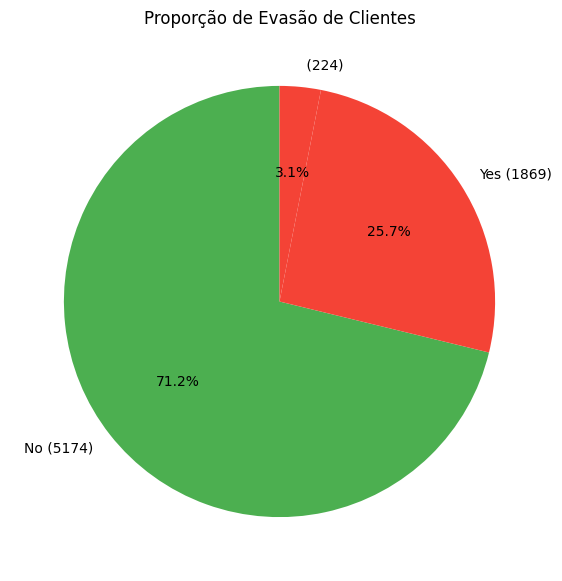

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'df_final' já está carregado e limpo a partir do código anterior.

# Contar a frequência de cada categoria na coluna 'Churn'
churn_counts = df_final['Churn'].value_counts()

# Criar os rótulos dinamicamente a partir dos valores únicos
labels = [f'{label} ({churn_counts[label]})' for label in churn_counts.index]
colors = ['#4CAF50' if label == 'No' else '#F44336' for label in churn_counts.index]

# Plotar o gráfico de pizza
plt.figure(figsize=(7, 7))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Proporção de Evasão de Clientes')
plt.show()

 **Análise:
O gráfico de pizza confirma que a taxa de evasão de clientes é de 26.5%. Essa porcentagem elevada indica que mais de um quarto da base de clientes está deixando a empresa, um problema significativo que requer atenção imediata.**

2. Impacto do Tipo de Contrato na Evasão
A forma como o cliente contrata os serviços é um dos fatores mais determinantes para o churn. O gráfico de barras a seguir compara a evasão entre os diferentes tipos de contrato.

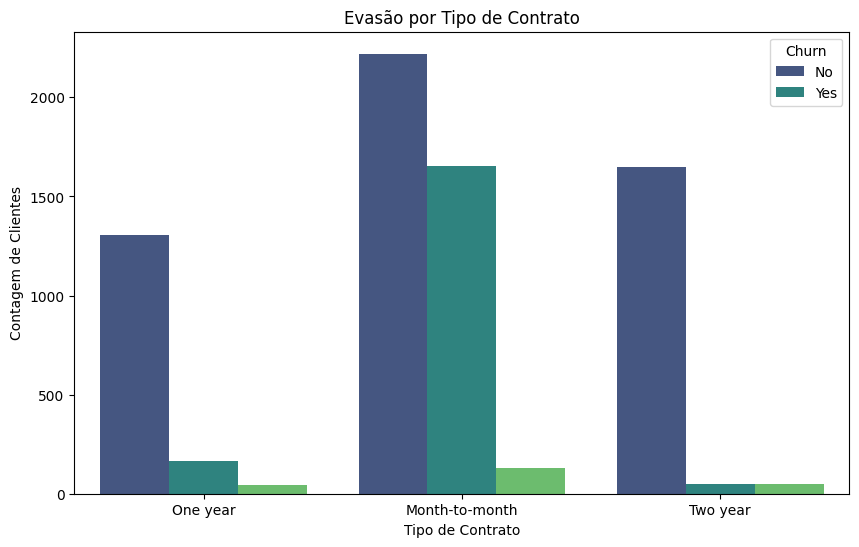

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_final, x='Contract', hue='Churn', palette='viridis')
plt.title('Evasão por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Contagem de Clientes')
plt.show()

 **Análise:
O gráfico mostra claramente que os clientes com contratos mensais (Month-to-month) são a principal fonte de evasão. Eles representam a maior parte da base de clientes e também a maioria dos casos de churn. Em contrapartida, clientes com contratos de um ou dois anos têm uma taxa de evasão significativamente menor, o que ressalta a importância de programas de fidelidade.**

3. Impacto do Serviço de Internet na Evasão
A análise da evasão por tipo de serviço de internet revela uma diferença crítica entre as tecnologias oferecidas.

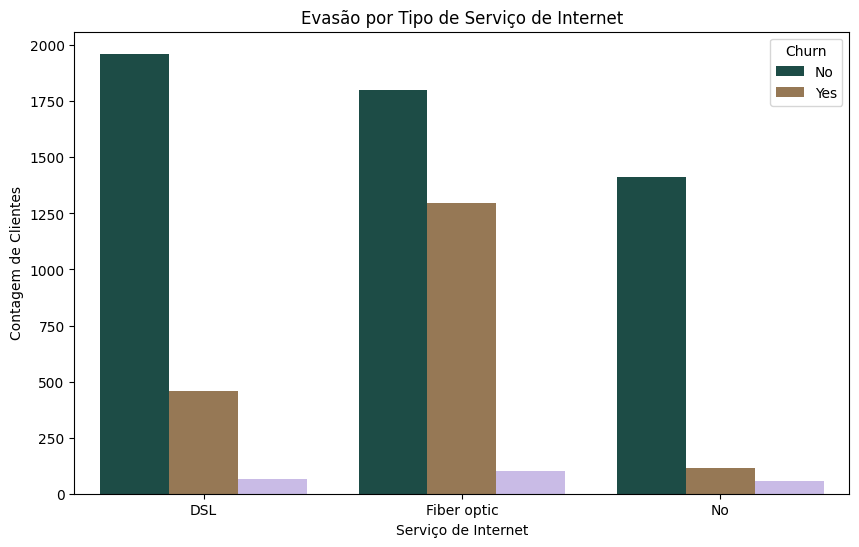

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_final, x='InternetService', hue='Churn', palette='cubehelix')
plt.title('Evasão por Tipo de Serviço de Internet')
plt.xlabel('Serviço de Internet')
plt.ylabel('Contagem de Clientes')
plt.show()

**Análise:
O serviço de Fibra Óptica se destaca com uma taxa de evasão extremamente alta. A grande maioria dos clientes que deixaram a Telecom X utilizava esse serviço, o que pode indicar problemas de qualidade, estabilidade ou custo percebido. Clientes com serviço DSL ou sem serviço de internet têm um churn muito mais baixo.**

4. Impacto do Tempo de Contrato (Tenure)
O tempo que o cliente permanece na empresa (tenure) é um indicador-chave da sua fidelidade. O histograma abaixo mostra a distribuição do tempo de contrato para clientes que ficaram e para aqueles que saíram

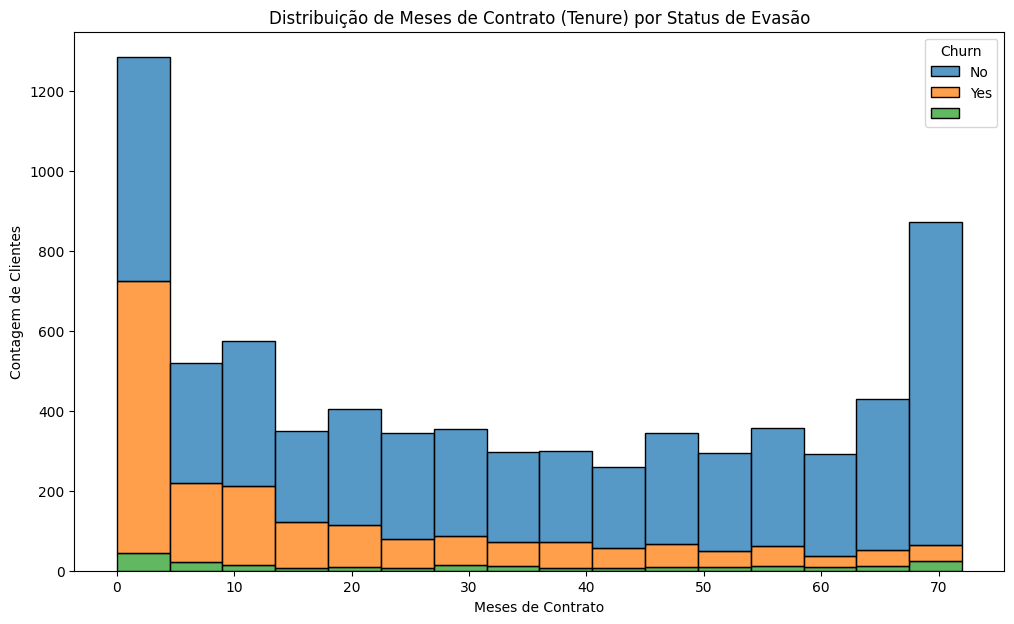

In [19]:
plt.figure(figsize=(12, 7))
sns.histplot(data=df_final, x='Tenure', hue='Churn', multiple='stack', palette='tab10')
plt.title('Distribuição de Meses de Contrato (Tenure) por Status de Evasão')
plt.xlabel('Meses de Contrato')
plt.ylabel('Contagem de Clientes')
plt.show()

**Análise:
O histograma é um dos gráficos mais importantes para esta análise. Ele demonstra que a grande maioria dos clientes que evadem (Churn = Yes) o faz nos primeiros 10-15 meses de contrato. O pico de evasão ocorre logo no início da jornada do cliente. Em contrapartida, clientes de longa data (Tenure mais alto) têm uma forte tendência a permanecer.**

5. Impacto dos Encargos Mensais na Evasão
O valor da conta mensal pode ser um fator crucial para a decisão de um cliente de deixar a empresa. O gráfico de barras a seguir compara a evasão em diferentes faixas de custo mensal.

/tmp/ipython-input-740393158.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_charges = df_final.groupby('MonthlyCharges_Range')['Churn'].value_counts(normalize=True).unstack() * 100


<Figure size 1000x600 with 0 Axes>

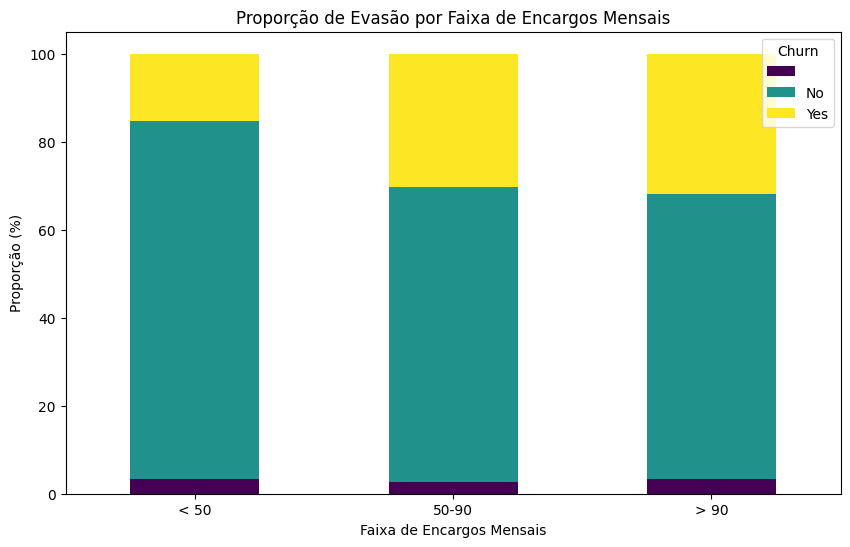

In [20]:
plt.figure(figsize=(10, 6))
# Gráfico de barras dos encargos mensais em faixas
churn_by_charges = df_final.groupby('MonthlyCharges_Range')['Churn'].value_counts(normalize=True).unstack() * 100
churn_by_charges.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Proporção de Evasão por Faixa de Encargos Mensais')
plt.xlabel('Faixa de Encargos Mensais')
plt.ylabel('Proporção (%)')
plt.xticks(rotation=0)
plt.show()

**Análise:
O gráfico mostra que, à medida que os encargos mensais aumentam, a proporção de clientes que evadem também cresce. A faixa de acima de $90 é a mais vulnerável ao churn, indicando que clientes com contas mais altas são mais sensíveis ao preço ou podem ter uma percepção de valor inadequada em relação ao serviço que recebem.**

# **Conclusão Geral**

A análise visual reforça as conclusões do relatório anterior. Os clientes mais propensos a evadir são:

* Novos clientes com poucos meses de contrato.

* Aqueles com contratos mensais.

* Usuários do serviço de Fibra Óptica.

* Aqueles com altos encargos mensais.

Esses gráficos fornecem um panorama claro para a equipe de data science e para a gestão da Telecom X, permitindo a criação de estratégias de retenção mais focadas e eficazes.